<a href="https://colab.research.google.com/github/Tokal-27/GTC-Customer-Churn-Prediction/blob/main/Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1 style="color: deepskyblue; font-weight: bold; font-size: 2.5em; margin: 0.67em 0;">Customer Churn Classification Notebook - Churn Dataset</h1>
</div>

## Feature Descriptions

| Feature            | Description                                      |
|--------------------|--------------------------------------------------|
| customerID         | Unique ID assigned to each customer              |
| gender             | Gender of the customer                           |
| SeniorCitizen      | Indicates if the customer is a senior citizen    |
| Partner            | Indicates if the customer has a partner          |
| Dependents         | Indicates if the customer has dependents         |
| tenure             | Number of months the customer has stayed with the company |
| PhoneService       | Indicates if the customer has a phone service    |
| MultipleLines      | Indicates if the customer has multiple phone lines |
| InternetService    | Internet service provider                       |
| OnlineSecurity     | Indicates if the customer has online security    |
| OnlineBackup       | Indicates if the customer has online backup      |
| DeviceProtection   | Indicates if the customer has device protection  |
| TechSupport        | Indicates if the customer has tech support       |
| StreamingTV        | Indicates if the customer has streaming TV service |
| StreamingMovies    | Indicates if the customer has streaming movies service |
| Contract           | Contract term of the customer                   |
| PaperlessBilling   | Indicates if the customer has paperless billing  |
| PaymentMethod      | Payment method used by the customer             |
| MonthlyCharges     | Monthly amount charged to the customer          |
| TotalCharges       | Total amount charged to the customer over the entire tenure |
| Churn              | Indicates if the customer has churned            |

# <span style="color:deepskyblue; font-weight:bold;">Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# <span style="color:deepskyblue; font-weight:bold;">Loading and Understanding the dataset</span>

In [2]:
df=pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df=df.drop('customerID',axis=1)

In [8]:
# Replaccing spaces with NaN
df[df.iloc[:, :] == ' '] = np.nan

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

22

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
# le = LabelEncoder()
# for col in df.select_dtypes(include=['object']).columns:
#     df[col] = le.fit_transform(df[col])

# <span style="color:deepskyblue; font-weight:bold;">Exploratory Data Analysis (EDA)</span>

In [16]:
plt.style.use('default')
sns.set_palette("husl")

print("DATASET ANALYSIS")
print("="*60)
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nColumn Types:")
print(df.dtypes)
print("="*60)

if 'loan_id' in df.columns:
    data_clean = df.drop('loan_id', axis=1)
    print("Dropped 'loan_id' column")
else:
    data_clean = df.copy()
    print("No 'loan_id' column found, using all columns")

categorical_columns = []
numerical_columns = []

for col in data_clean.columns:
    if data_clean[col].dtype == 'object' or col=='SeniorCitizen':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print(f"\nAuto-detected columns:")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print("="*60)


DATASET ANALYSIS
Dataset Info:
Shape: (7010, 20)
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Column Types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
No 'loan_id' column found, using all column

 <span style="color:deepskyblue; font-weight:bold;">Categorical Columns Analysis</span>


CATEGORICAL COLUMNS ANALYSIS
----------------------------------------


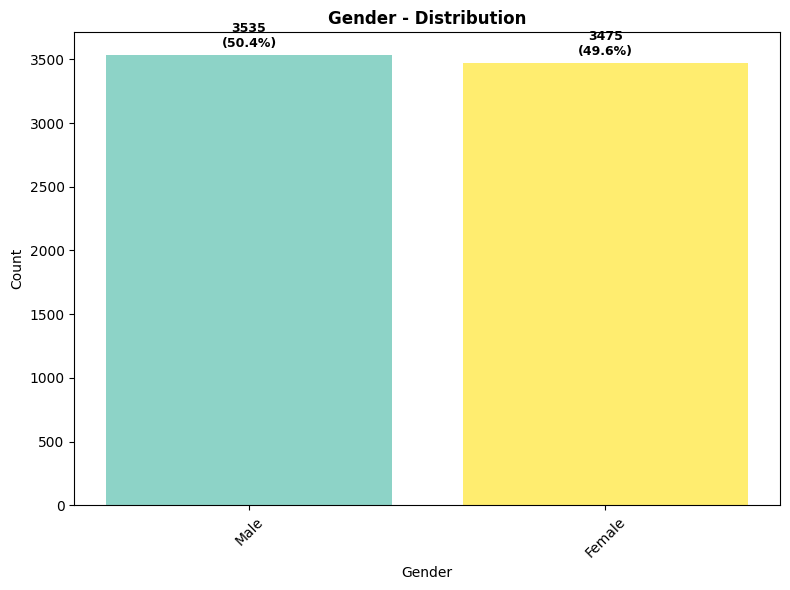


GENDER Summary:
  Male: 3535 (50.43%)
  Female: 3475 (49.57%)


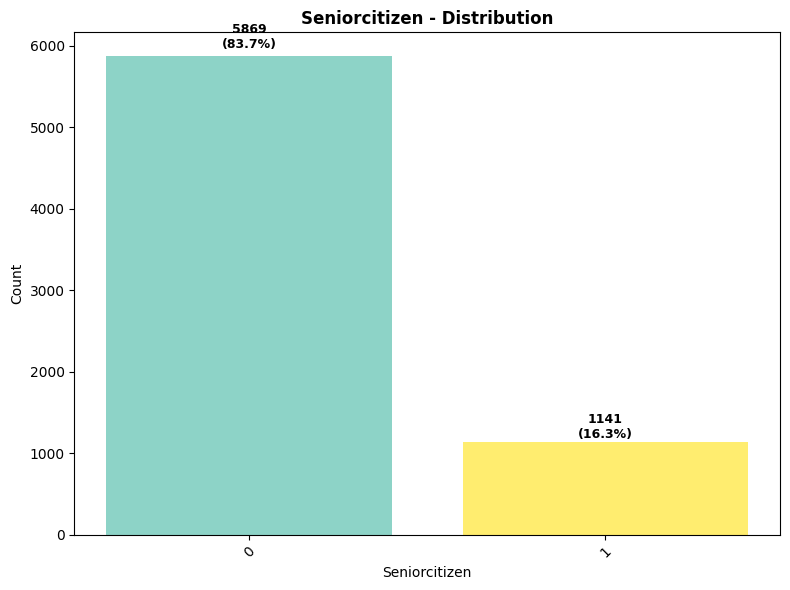


SENIORCITIZEN Summary:
  0: 5869 (83.72%)
  1: 1141 (16.28%)


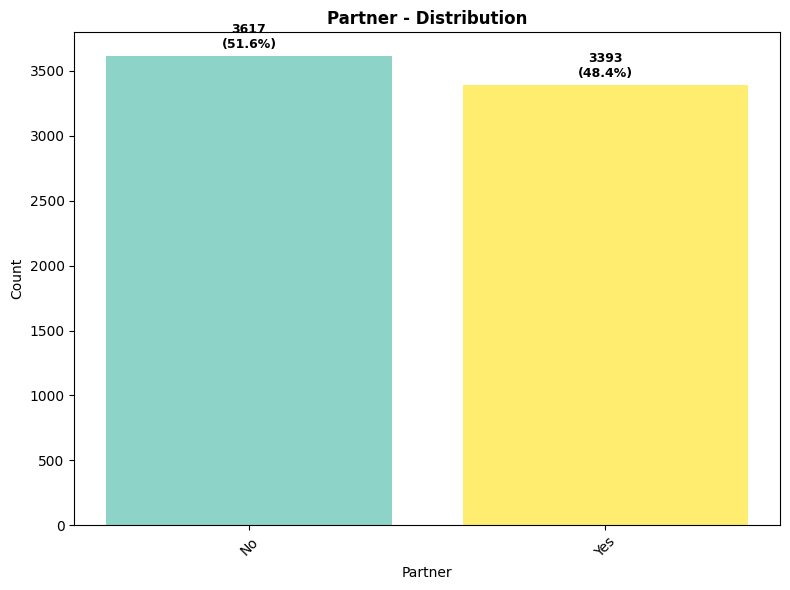


PARTNER Summary:
  No: 3617 (51.6%)
  Yes: 3393 (48.4%)


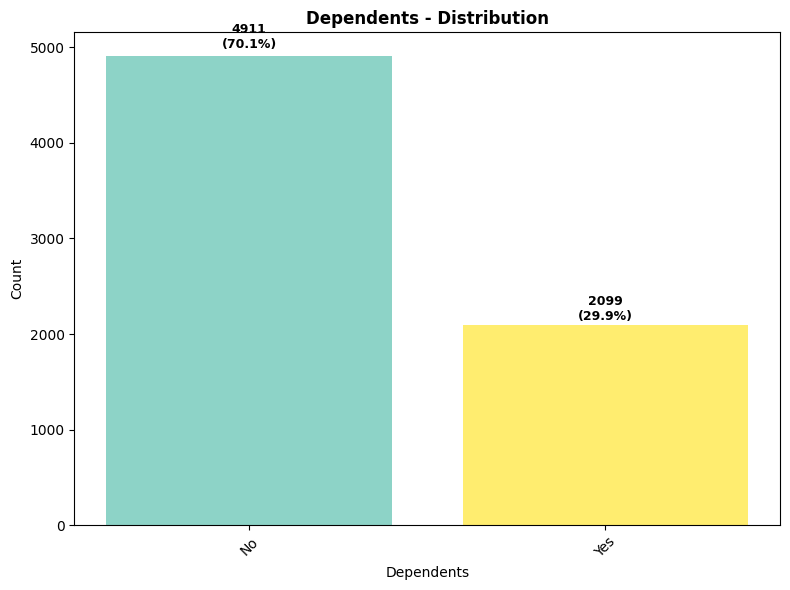


DEPENDENTS Summary:
  No: 4911 (70.06%)
  Yes: 2099 (29.94%)


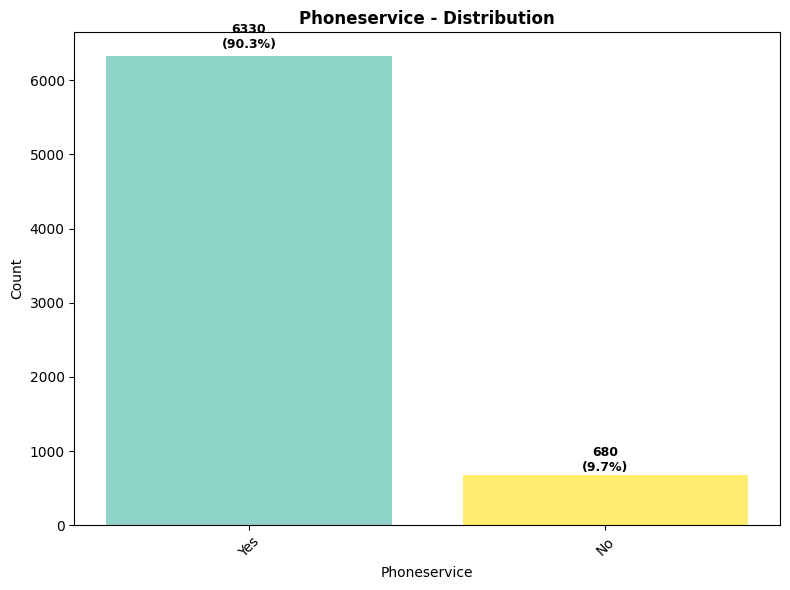


PHONESERVICE Summary:
  Yes: 6330 (90.3%)
  No: 680 (9.7%)


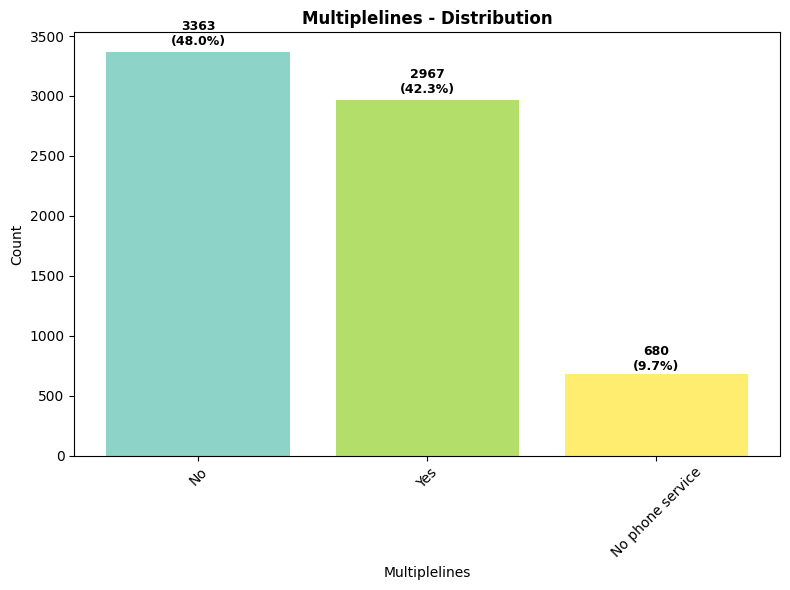


MULTIPLELINES Summary:
  No: 3363 (47.97%)
  Yes: 2967 (42.33%)
  No phone service: 680 (9.7%)


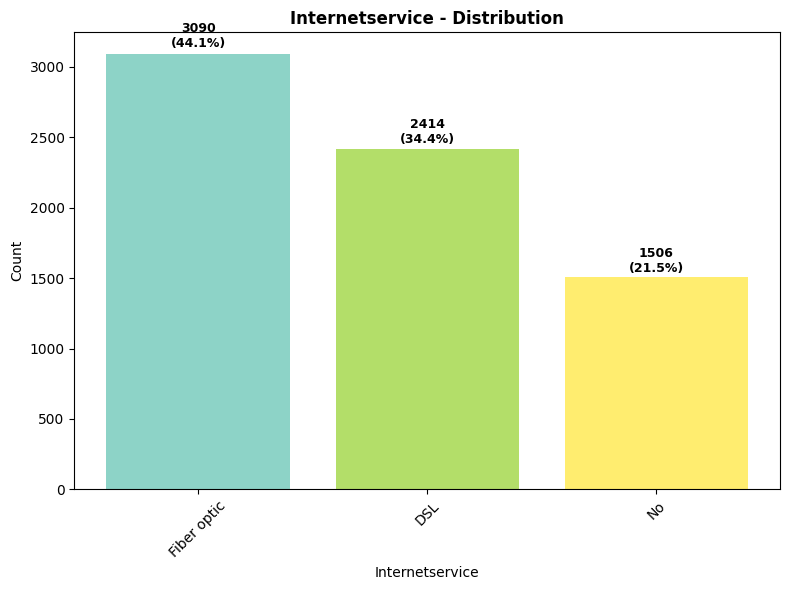


INTERNETSERVICE Summary:
  Fiber optic: 3090 (44.08%)
  DSL: 2414 (34.44%)
  No: 1506 (21.48%)


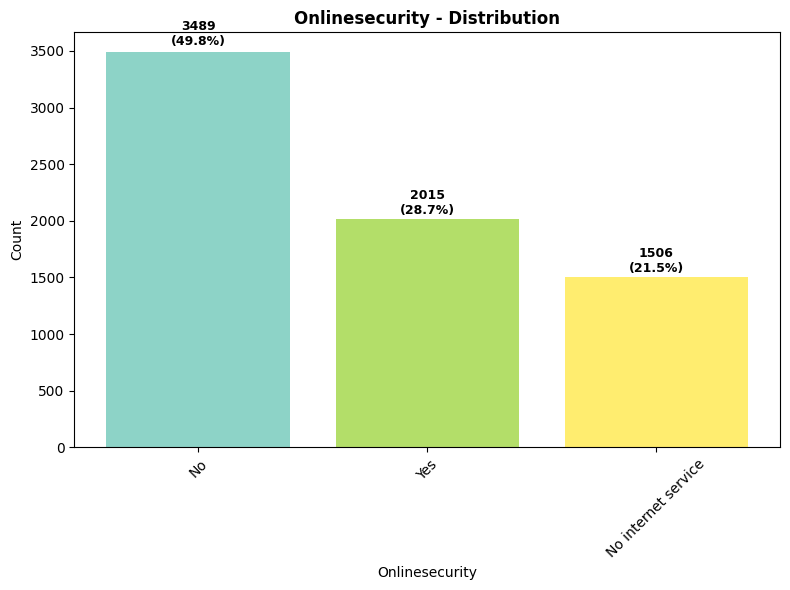


ONLINESECURITY Summary:
  No: 3489 (49.77%)
  Yes: 2015 (28.74%)
  No internet service: 1506 (21.48%)


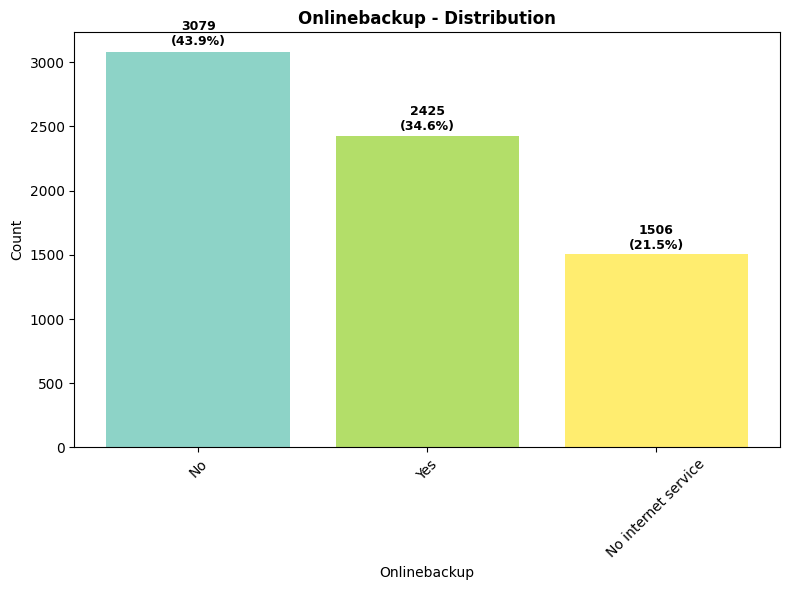


ONLINEBACKUP Summary:
  No: 3079 (43.92%)
  Yes: 2425 (34.59%)
  No internet service: 1506 (21.48%)


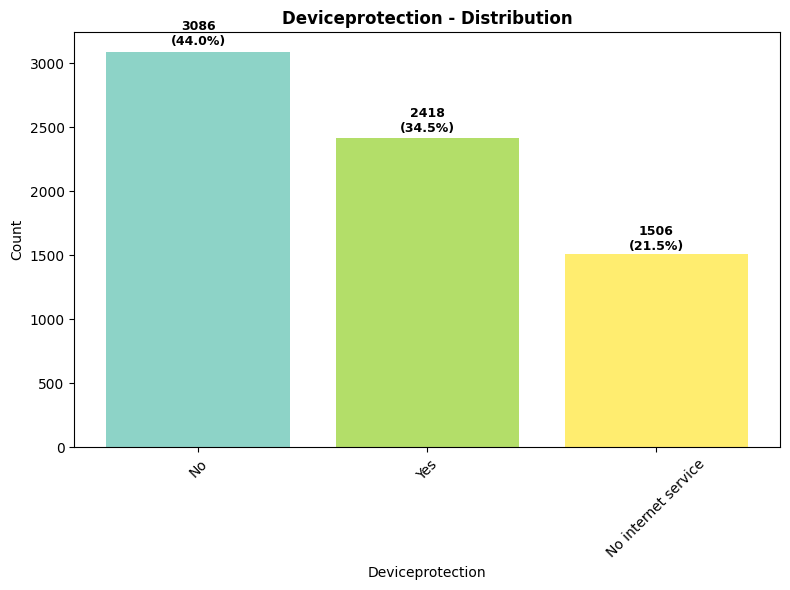


DEVICEPROTECTION Summary:
  No: 3086 (44.02%)
  Yes: 2418 (34.49%)
  No internet service: 1506 (21.48%)


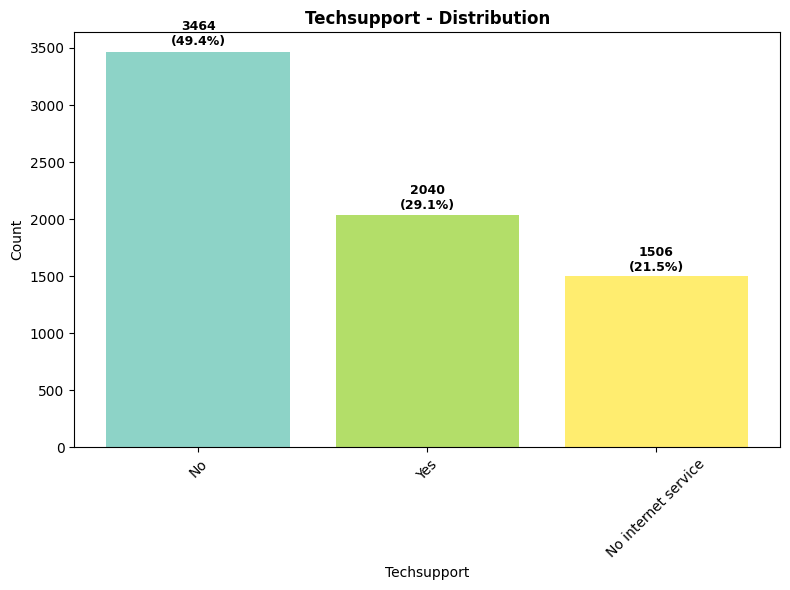


TECHSUPPORT Summary:
  No: 3464 (49.42%)
  Yes: 2040 (29.1%)
  No internet service: 1506 (21.48%)


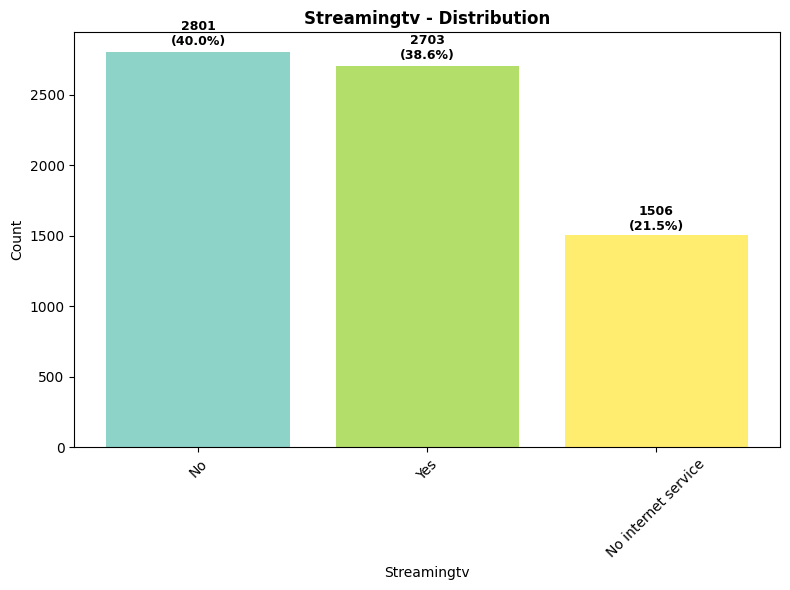


STREAMINGTV Summary:
  No: 2801 (39.96%)
  Yes: 2703 (38.56%)
  No internet service: 1506 (21.48%)


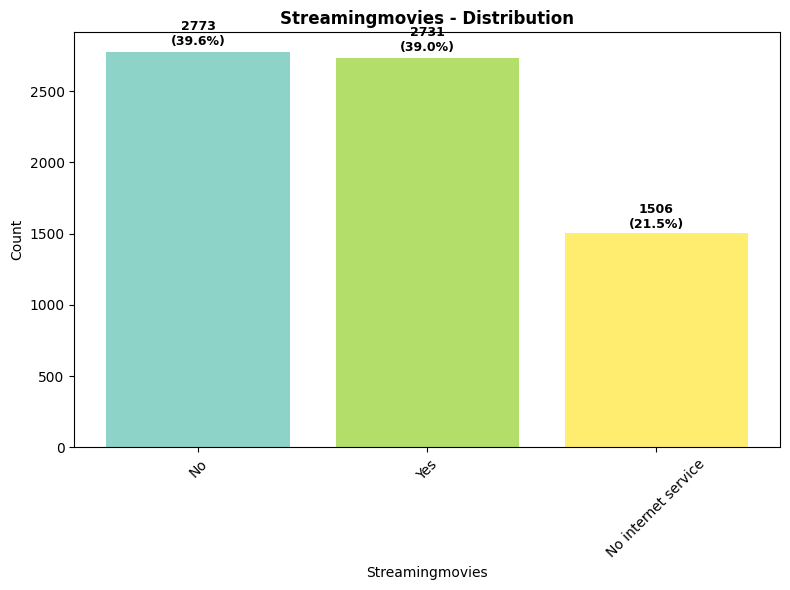


STREAMINGMOVIES Summary:
  No: 2773 (39.56%)
  Yes: 2731 (38.96%)
  No internet service: 1506 (21.48%)


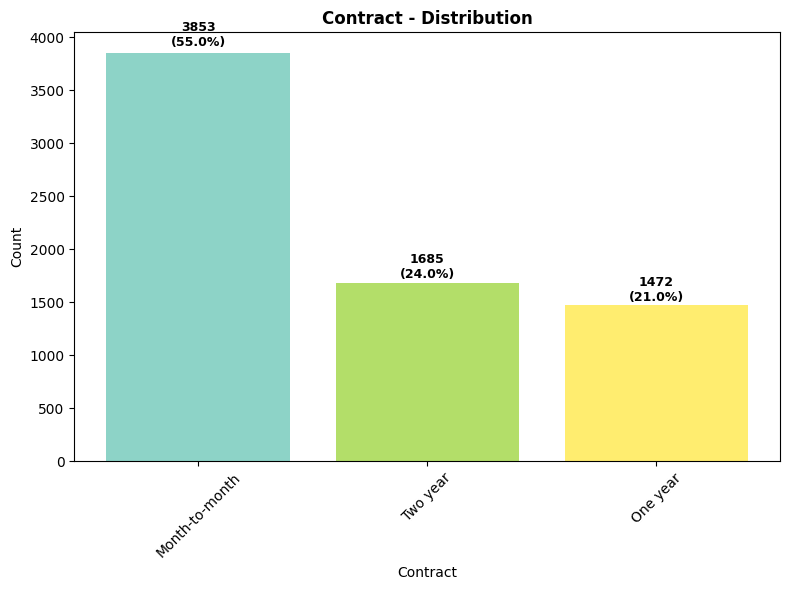


CONTRACT Summary:
  Month-to-month: 3853 (54.96%)
  Two year: 1685 (24.04%)
  One year: 1472 (21.0%)


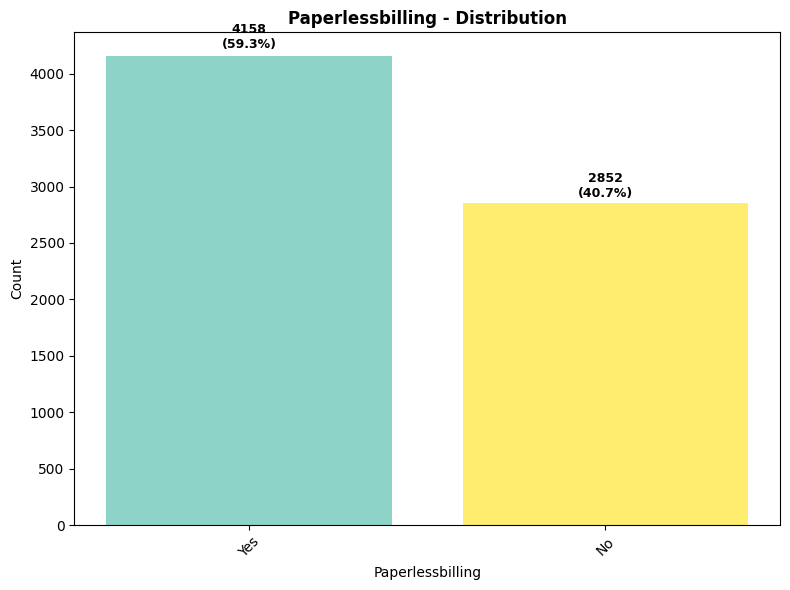


PAPERLESSBILLING Summary:
  Yes: 4158 (59.32%)
  No: 2852 (40.68%)


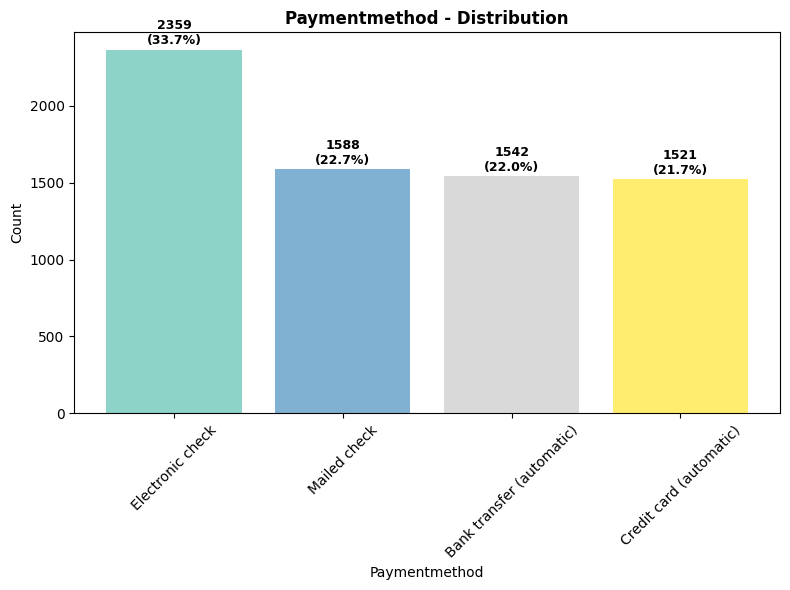


PAYMENTMETHOD Summary:
  Electronic check: 2359 (33.65%)
  Mailed check: 1588 (22.65%)
  Bank transfer (automatic): 1542 (22.0%)
  Credit card (automatic): 1521 (21.7%)


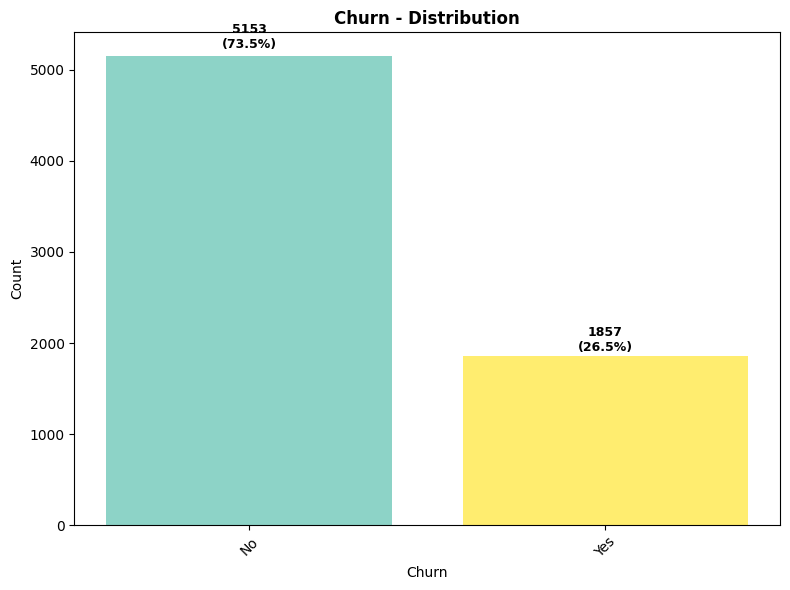


CHURN Summary:
  No: 5153 (73.51%)
  Yes: 1857 (26.49%)


In [17]:
print("\nCATEGORICAL COLUMNS ANALYSIS")
print("-" * 40)

if len(categorical_columns) > 0:
    for col in categorical_columns:
        # Bar Plot
        fig_bar, ax_bar = plt.subplots(figsize=(8, 6))
        value_counts = df[col].value_counts()
        bars = ax_bar.bar(range(len(value_counts)), value_counts.values, 
                         color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
        ax_bar.set_title(f'{col.title().replace("_", " ")} - Distribution', 
                        fontweight='bold', fontsize=12)
        ax_bar.set_xlabel(col.title().replace("_", " "))
        ax_bar.set_ylabel('Count')
        ax_bar.set_xticks(range(len(value_counts)))
        ax_bar.set_xticklabels(value_counts.index, rotation=45)
        
        for bar, count in zip(bars, value_counts.values):
            height = bar.get_height()
            ax_bar.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{count}\n({count/len(df)*100:.1f}%)',
                       ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # # Pie Plot
        # fig_pie, ax_pie = plt.subplots(figsize=(8, 6))
        # colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
        # wedges, texts, autotexts = ax_pie.pie(value_counts.values, 
        #                                      labels=value_counts.index,
        #                                      autopct='%1.1f%%',
        #                                      colors=colors,
        #                                      startangle=90,
        #                                      explode=[0.05]*len(value_counts))
        # ax_pie.set_title(f'{col.title().replace("_", " ")} - Proportional Distribution', 
        #                 fontweight='bold', fontsize=12)
        
        # for autotext in autotexts:
        #     autotext.set_color('white')
        #     autotext.set_fontweight('bold')
        
        # plt.tight_layout()
        # plt.show()
        
        # Summary
        print(f"\n{col.upper()} Summary:")
        percentages = (value_counts / len(df) * 100).round(2)
        for value, count, pct in zip(value_counts.index, value_counts.values, percentages):
            print(f"  {value}: {count} ({pct}%)")
else:
    print("No categorical columns found.")

From the Categorical analysis  The target **Churn** is imbalanced, with 73.51% (5153) "No" and 26.49% (1857) "Yes", indicating a significant majority of non-churned customers.
The imbalance suggests potential bias in modeling toward the majority class. Oversampling Technique (SMOTE) could be applied to oversample the "Yes" class, generating synthetic examples to balance the dataset and improve model performance for churn prediction.

 <span style="color:deepskyblue; font-weight:bold;">Numerical Columns Analysis</span>



NUMERICAL COLUMNS ANALYSIS
----------------------------------------


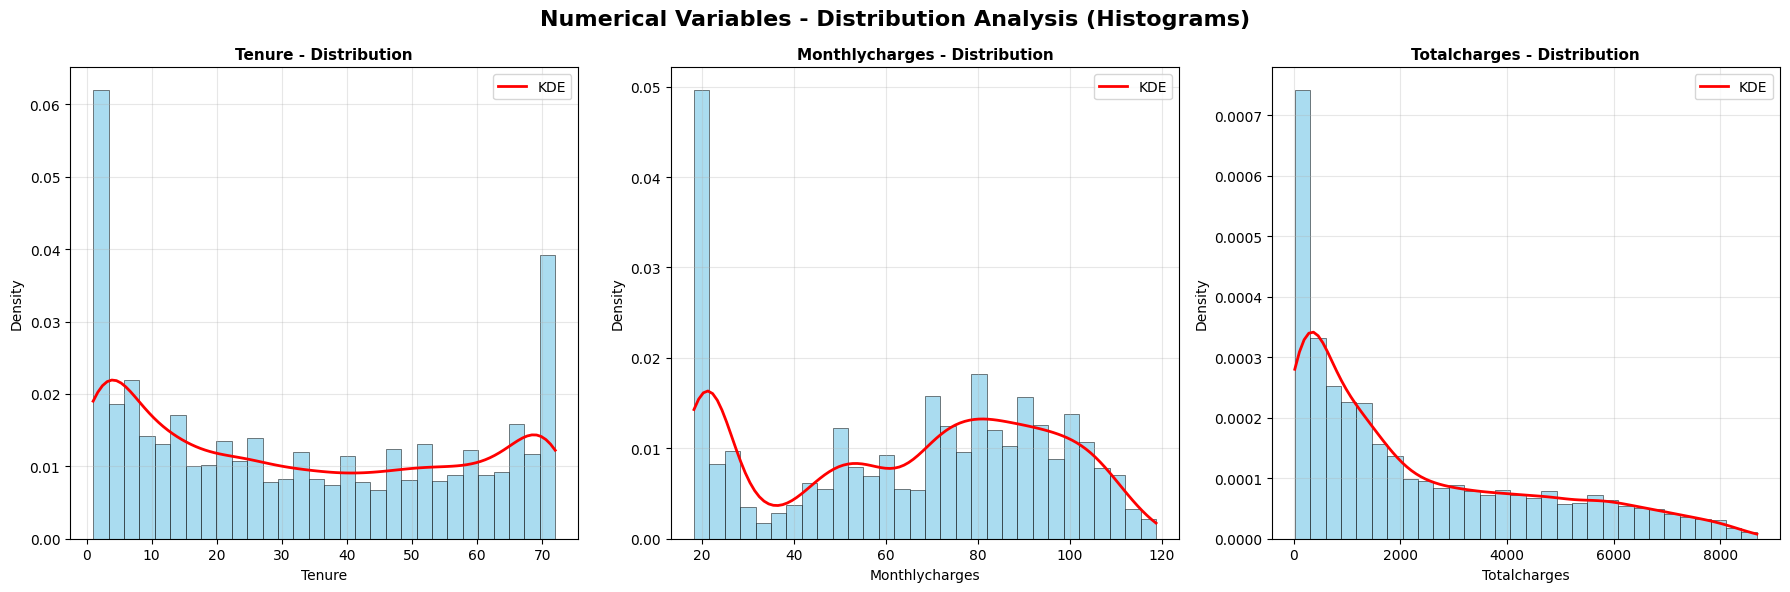

In [18]:
print("\n\nNUMERICAL COLUMNS ANALYSIS")
print("-" * 40)

n_num_cols = len(numerical_columns)
num_rows = (n_num_cols + 2) // 3
num_cols = 3

fig_hist, axes_hist = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
fig_hist.suptitle('Numerical Variables - Distribution Analysis (Histograms)', 
                    fontsize=16, fontweight='bold', y=0.98)

axes_hist = axes_hist.flatten() if n_num_cols > 1 else [axes_hist]

for i, col in enumerate(numerical_columns):
    if i < len(axes_hist):
        axes_hist[i].hist(data_clean[col], bins=30, alpha=0.7, color='skyblue', 
                            density=True, edgecolor='black', linewidth=0.5)
        
        try:
            kde_x = np.linspace(data_clean[col].min(), data_clean[col].max(), 100)
            kde = stats.gaussian_kde(data_clean[col])
            axes_hist[i].plot(kde_x, kde(kde_x), color='red', linewidth=2, label='KDE')
        except:
            pass
        
        axes_hist[i].set_title(f'{col.title().replace("_", " ")} - Distribution', 
                                fontweight='bold', fontsize=11)
        axes_hist[i].set_xlabel(col.title().replace("_", " "))
        axes_hist[i].set_ylabel('Density')
        axes_hist[i].grid(True, alpha=0.3)
        axes_hist[i].legend()

for i in range(n_num_cols, len(axes_hist)):
    axes_hist[i].set_visible(False)

plt.tight_layout()
plt.show()


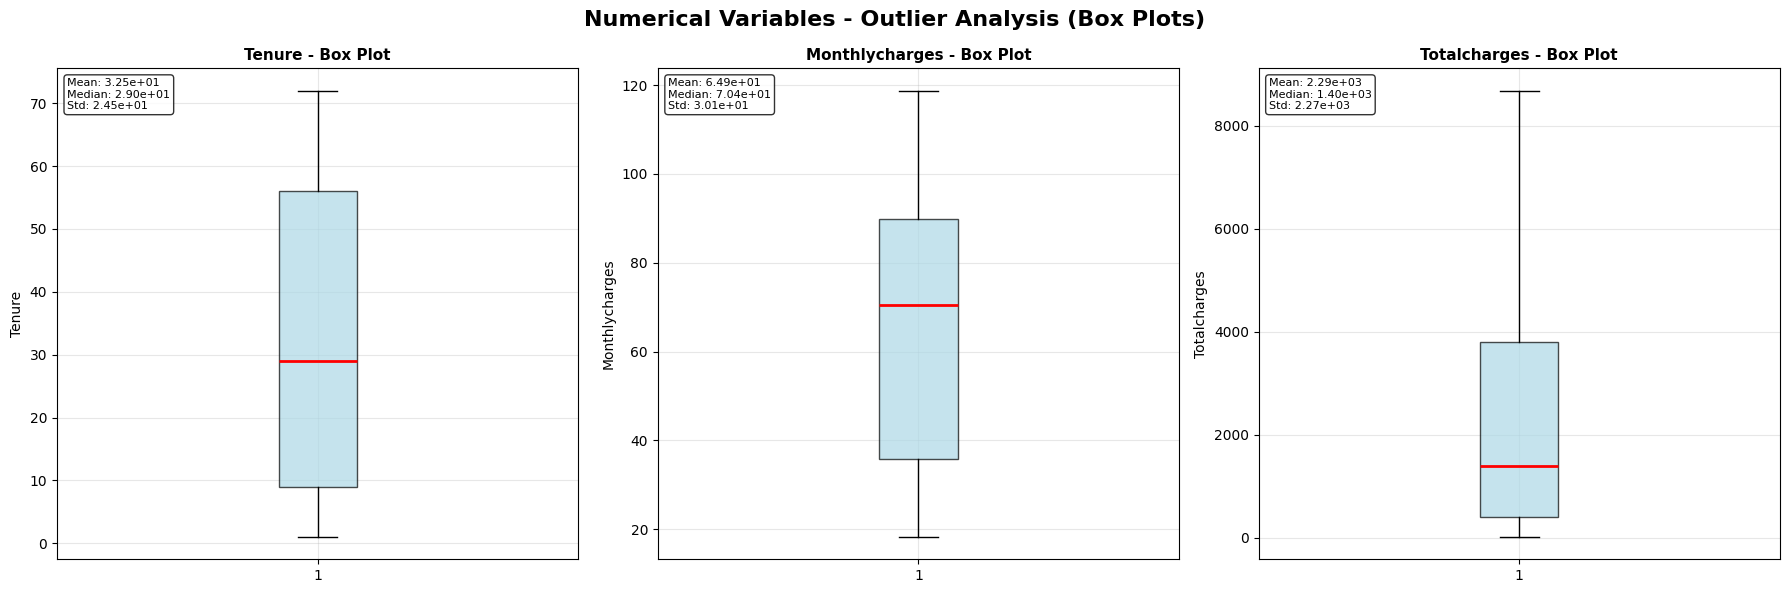


Numerical Variables Summary Statistics:
            tenure  MonthlyCharges  TotalCharges
count     7.01e+03        7.01e+03      7.01e+03
mean      3.25e+01        6.49e+01      2.29e+03
std       2.45e+01        3.01e+01      2.27e+03
min       1.00e+00        1.82e+01      1.88e+01
25%       9.00e+00        3.58e+01      4.08e+02
50%       2.90e+01        7.04e+01      1.40e+03
75%       5.60e+01        8.99e+01      3.81e+03
max       7.20e+01        1.19e+02      8.68e+03
skewness  2.34e-01       -2.26e-01      9.58e-01
kurtosis -1.39e+00       -1.25e+00     -2.39e-01


In [19]:

fig_box, axes_box = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
fig_box.suptitle('Numerical Variables - Outlier Analysis (Box Plots)', 
                    fontsize=16, fontweight='bold', y=0.98)

axes_box = axes_box.flatten() if n_num_cols > 1 else [axes_box]

for i, col in enumerate(numerical_columns):
    if i < len(axes_box):
        box_plot = axes_box[i].boxplot(data_clean[col], patch_artist=True, 
                                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                                        medianprops=dict(color='red', linewidth=2),
                                        flierprops=dict(marker='o', markerfacecolor='red', 
                                                    markersize=5, alpha=0.5))
        
        axes_box[i].set_title(f'{col.title().replace("_", " ")} - Box Plot', 
                                fontweight='bold', fontsize=11)
        axes_box[i].set_ylabel(col.title().replace("_", " "))
        axes_box[i].grid(True, alpha=0.3)
        
        q1, median, q3 = np.percentile(data_clean[col], [25, 50, 75])
        mean_val = data_clean[col].mean()
        std_val = data_clean[col].std()
        
        stats_text = f'Mean: {mean_val:.2e}\nMedian: {median:.2e}\nStd: {std_val:.2e}'
        axes_box[i].text(0.02, 0.98, stats_text, transform=axes_box[i].transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', 
                        facecolor='white', alpha=0.8), fontsize=8)

for i in range(n_num_cols, len(axes_box)):
    axes_box[i].set_visible(False)

plt.tight_layout()
plt.show()

print("\nNumerical Variables Summary Statistics:")
print("=" * 80)

summary_stats = data_clean[numerical_columns].describe()

additional_stats = pd.DataFrame(index=['skewness', 'kurtosis'])
for col in numerical_columns:
    additional_stats.loc['skewness', col] = stats.skew(data_clean[col])
    additional_stats.loc['kurtosis', col] = stats.kurtosis(data_clean[col])

full_summary = pd.concat([summary_stats, additional_stats])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2e}'.format)

print(full_summary)

pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.float_format')


##### Numerical Variables - Distribution Analysis (Histograms) & Outlier Analysis (Box Plots)
- **Tenure**: Right-skewed distribution with a peak at 0-10 months, few outliers beyond 60 months (Box Plot).
- **MonthlyCharges**: Bimodal distribution with peaks around 20-40 and 80-100, minimal outliers near 120 (Box Plot).
- **TotalCharges**: Right-skewed with a long tail, peaking at 0-2000, and some outliers above 8000 (Box Plot).
- KDE of `TotalCharges` showing the widest spread.

 <span style="color:deepskyblue; font-weight:bold;">Encoding Categorical Columns</span>

In [20]:
data_encoded = data_clean.copy()

# Define column groups
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaymentMethod']

In [21]:

# Label Encoding for binary columns (preserve original names)
for col in binary_cols:
    if col in data_encoded.columns:  # Ensure column exists
        data_encoded[col] = data_encoded[col].map({'No': 0, 'Yes': 1} if col != 'gender' else {'Male': 0, 'Female': 1})

# Label Encoding for ordinal 'Contract'
contract_order = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
data_encoded['Contract'] = data_encoded['Contract'].map(contract_order)


In [22]:

# One-Hot Encoding for multi-category nominal variables (excluding Contract)
data_encoded = pd.get_dummies(data_encoded, columns=[col for col in multi_cols if col != 'Contract'], drop_first=True)


 <span style="color:deepskyblue; font-weight:bold;">Heatmap Analysis</span>



CORRELATION ANALYSIS - Numerical Variables
----------------------------------------


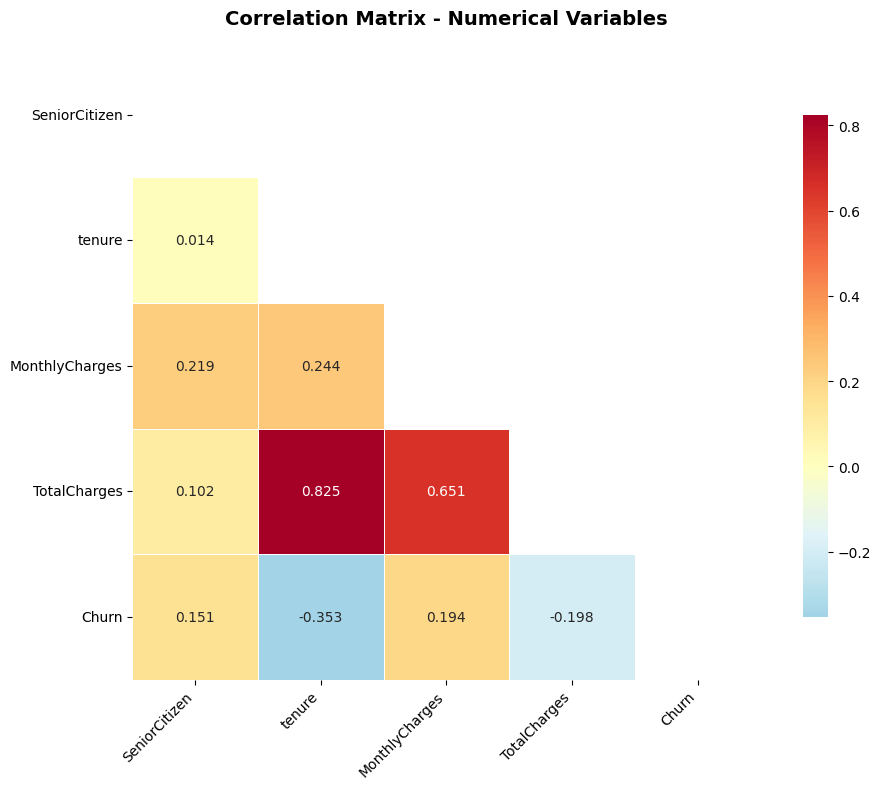

In [23]:

# --- Numerical Heatmap ---
print("\n\nCORRELATION ANALYSIS - Numerical Variables")
print("-" * 40)
correlation_matrix_num = data_encoded[numerical_cols + ['Churn']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix_num, dtype=bool))
heatmap_num = sns.heatmap(correlation_matrix_num, mask=mask, annot=True, cmap='RdYlBu_r', 
                          center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                          fmt='.3f', annot_kws={'size': 10})
plt.title('Correlation Matrix - Numerical Variables', fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### Correlation Matrix - Numerical Variables
- Strong positive correlations: `tenure` and `TotalCharges` (0.825), `MonthlyCharges` and `TotalCharges` (0.651).
- Negative correlations with `Churn`: `tenure` (-0.353) and `TotalCharges` (-0.198), indicating longer tenure and higher total charges reduce churn likelihood.
- Weak correlations: `SeniorCitizen` with others (e.g., 0.014 with `tenure`).



CORRELATION ANALYSIS - Binary Categorical Variables
----------------------------------------


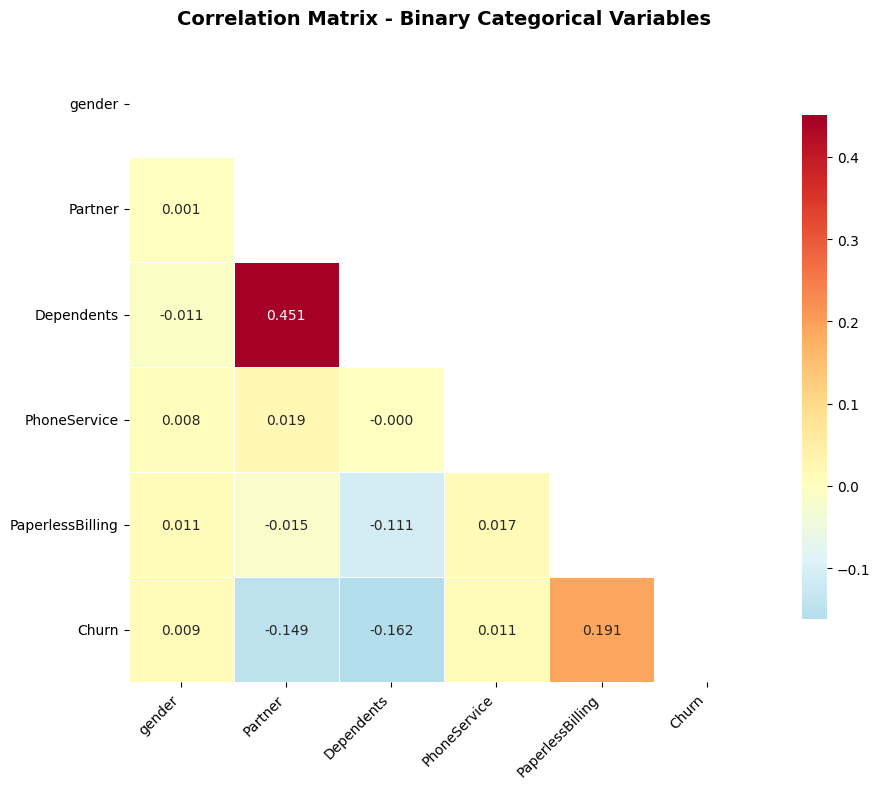

In [24]:

# --- Binary Categorical Heatmap ---
print("\n\nCORRELATION ANALYSIS - Binary Categorical Variables")
print("-" * 40)
correlation_matrix_binary = data_encoded[binary_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix_binary, dtype=bool))
heatmap_binary = sns.heatmap(correlation_matrix_binary, mask=mask, annot=True, cmap='RdYlBu_r', 
                             center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                             fmt='.3f', annot_kws={'size': 10})
plt.title('Correlation Matrix - Binary Categorical Variables', fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### Correlation Matrix - Binary Categorical Variables
- Strong positive correlation: `Partner` and `Dependents` (0.451), suggesting family-related stability.
- Positive correlation with `Churn`: `PaperlessBilling` (0.191), indicating higher churn risk.
- Negative correlations with `Churn`: `Partner` (-0.149) and `Dependents` (-0.162), showing family presence reduces churn.

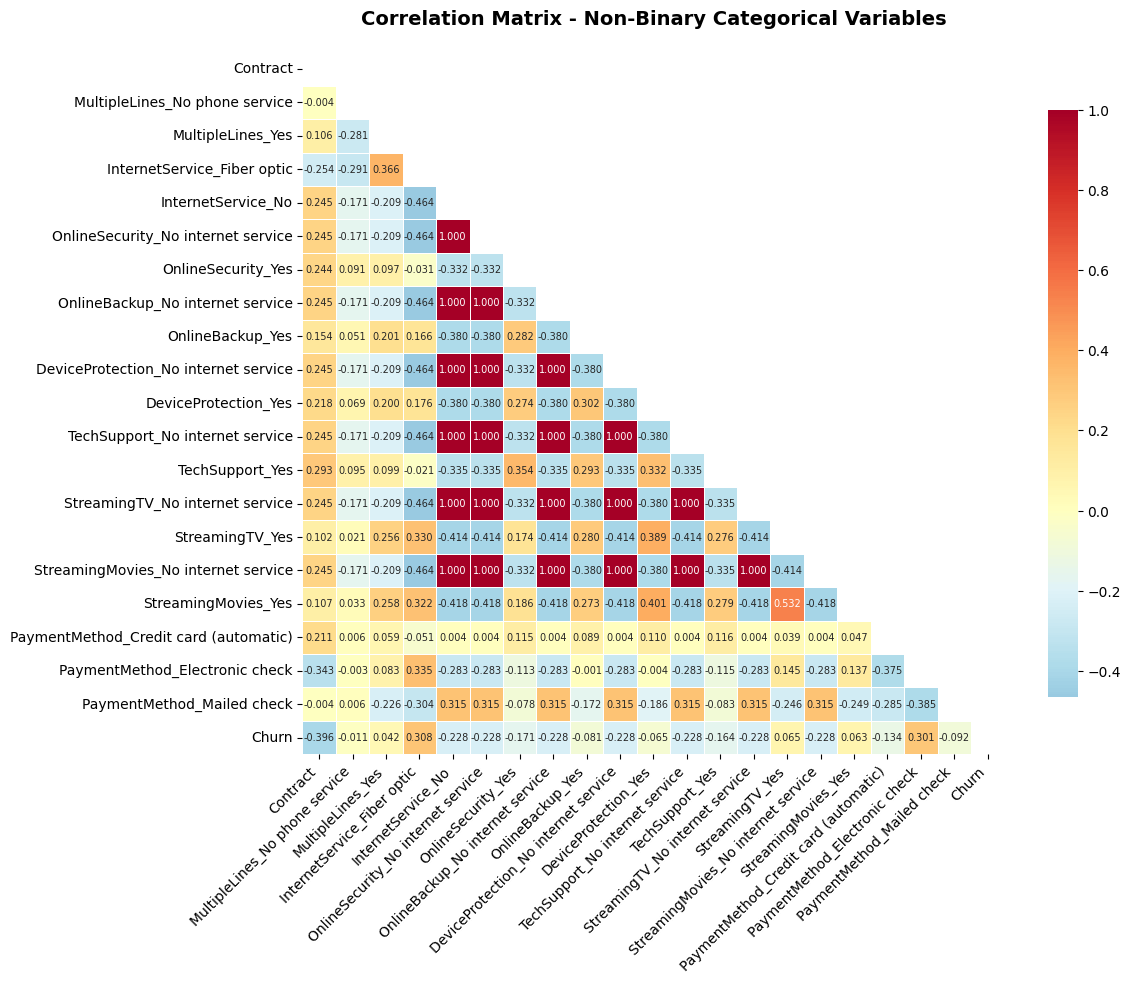

In [25]:
# --- Non-Binary Categorical Heatmap ---
non_binary_cols = [col for col in data_encoded.columns if any(col.startswith(prefix) for prefix in multi_cols) or col == 'Contract'] + ['Churn']
correlation_matrix_non_binary = data_encoded[non_binary_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix_non_binary, dtype=bool))
heatmap_non_binary = sns.heatmap(correlation_matrix_non_binary, mask=mask, annot=True, cmap='RdYlBu_r', 
                                 center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                                 fmt='.3f', annot_kws={'size': 7})  # Smaller font for more columns
plt.title('Correlation Matrix - Non-Binary Categorical Variables', fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Correlation Matrix - Non-Binary Categorical Variables
- Strong positive correlations: `InternetService_Fiber optic` and `StreamingTV_Yes` (0.335), `PaymentMethod_Electronic check` and `Churn` (0.375), highlighting churn risks with fiber and electronic payments.
- High self-correlations: Service pairs (e.g., `OnlineSecurity_Yes` and `TechSupport_Yes`, ~0.3-0.4) due to one-hot encoding.
- Negative correlation: `Contract` (higher values) with `Churn`, suggesting longer contracts reduce churn.

 <span style="color:deepskyblue; font-weight:bold;">Feature Engineering</span>

In [26]:
# Tenure_to_TotalCharges_Ratio
data_encoded['Tenure_to_TotalCharges_Ratio'] = data_encoded['TotalCharges'] / data_encoded['tenure'].replace(0, 1)  # Avoid division by zero

# High_MonthlyCharges_Flag
threshold = data_encoded['MonthlyCharges'].quantile(0.75)  # 75th percentile
data_encoded['High_MonthlyCharges_Flag'] = (data_encoded['MonthlyCharges'] > threshold).astype(int)

# Partner_Dependents_Combo
data_encoded['Partner_Dependents_Combo'] = ((data_encoded['Partner'] == 1) & (data_encoded['Dependents'] == 1)).astype(int)

# PaperlessBilling_Risk
data_encoded['PaperlessBilling_Risk'] = data_encoded['PaperlessBilling']

# ElectronicCheck_Churn_Risk
data_encoded['ElectronicCheck_Churn_Risk'] = data_encoded['PaymentMethod_Electronic check'].fillna(0).astype(int)

# Display the first few rows of the new features to verify
print("First few rows of new features:")
print(data_encoded[['Tenure_to_TotalCharges_Ratio', 'High_MonthlyCharges_Flag', 
                    'Partner_Dependents_Combo', 'PaperlessBilling_Risk', 
                    'ElectronicCheck_Churn_Risk']].head())

First few rows of new features:
   Tenure_to_TotalCharges_Ratio  High_MonthlyCharges_Flag  \
0                     29.850000                         0   
1                     55.573529                         0   
2                     54.075000                         0   
3                     40.905556                         0   
4                     75.825000                         0   

   Partner_Dependents_Combo  PaperlessBilling_Risk  ElectronicCheck_Churn_Risk  
0                         0                      1                           1  
1                         0                      0                           0  
2                         0                      1                           0  
3                         0                      0                           0  
4                         0                      1                           1  



Correlation of Feature Engineered Columns with Churn:
ElectronicCheck_Churn_Risk      0.301079
Tenure_to_TotalCharges_Ratio    0.193175
PaperlessBilling_Risk           0.190518
High_MonthlyCharges_Flag        0.083962
Partner_Dependents_Combo       -0.158603
Name: Churn, dtype: float64


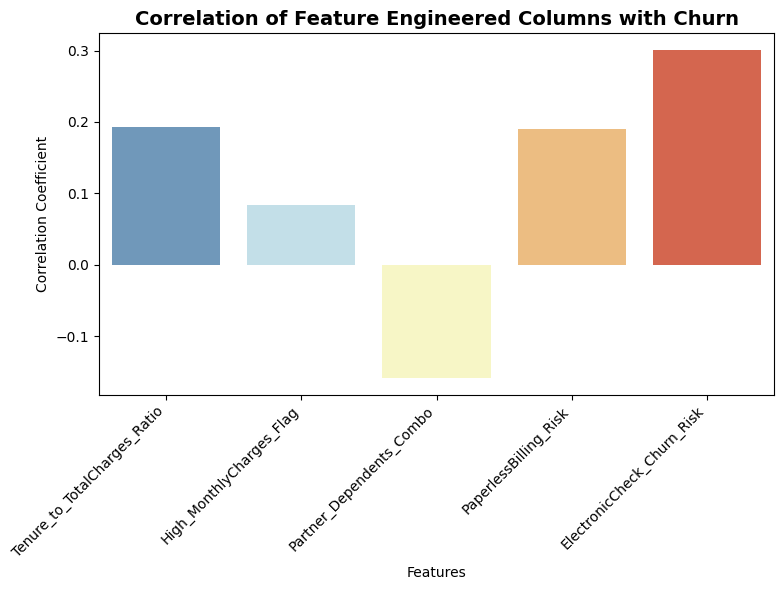

In [27]:
feature_engineered_cols = ['Tenure_to_TotalCharges_Ratio', 'High_MonthlyCharges_Flag', 
                          'Partner_Dependents_Combo', 'PaperlessBilling_Risk', 
                          'ElectronicCheck_Churn_Risk', 'Churn']
correlation_with_churn = data_encoded[feature_engineered_cols].corr()['Churn'].drop('Churn')

# Display the correlation values
print("\nCorrelation of Feature Engineered Columns with Churn:")
print(correlation_with_churn.sort_values(ascending=False))

# Visualize the correlations

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='RdYlBu_r')
plt.title('Correlation of Feature Engineered Columns with Churn', fontweight='bold', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Impact of New Feature Engineering Columns on Churn

- **ElectronicCheck_Churn_Risk (0.301)**: Strongest positive correlation
- **Tenure_to_TotalCharges_Ratio (0.193)**: Moderate positive link
- **PaperlessBilling_Risk (0.191)**: Positive correlation
- **High_MonthlyCharges_Flag (0.084)**: Weak positive effect
- **Partner_Dependents_Combo (-0.159)**: Moderate negative correlation
